# QVI Project - Retail Strategy and Analytics

## Transaction Data Dataset

In this project, I will conduct analysis on a client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.

### Importing the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime 
import matplotlib.pyplot as plt
import re

In [2]:
# Import the QVI_transaction_data dataset into Jupyter Notebooks

file_location = 'C:\\Users\\DELL\\Desktop\\QVI DATA\\QVI Task 1\\'
transaction_data = pd.read_excel(file_location + 'QVI_transaction_data.xlsx')

In [3]:
# View the first 5 rows of our dataframe

transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
# View the last 5 rows of our dataframe

transaction_data.tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,43365,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


In [5]:
# View the datatypes of columns in our dataframe

transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [6]:
# View the shape of our dataframe

transaction_data.shape

(264836, 8)

From the initial view of our data, we have 264,836 rows and 8 columns. The most common datatype is int64 for 6 of the 8 columns. However, some of the columns have the wrong datatype and we will change those datatypes, for example, the DATE column.

## Data Cleaning

### Looking at the DATE Column

In [7]:
# convert the Excel serial numbers to date datatype
# A quick search online tells us that CSV and Excel integer dates begin on 30 Dec 1899

transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], unit='D', origin='1899-12-30')

# print the resulting DataFrame
print(transaction_data['DATE'].dtype)

datetime64[ns]


In [8]:
# View the first 5 rows of our dataframe

transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### Looking at the PROD_NAME Column

From this column we need to derive product names and pack size

In [9]:
# View summary of the data in the column

transaction_data['PROD_NAME']

0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object

In [10]:
# We have to check this column to ensure we only have chip products data only, hence remove special characters

# Replace all non-alphanumeric characters with a space in the PROD_NAME column
transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].str.replace('[^a-zA-Z0-9 ]', ' ', regex=True)

# Display the updated transaction_data dataframe
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili 150g,3,13.8


In [11]:
# Now let's look at the at the most common words by counting the number of times a word appears and sort them by this frequency in order of highest to lowest frequency


from collections import Counter

# Combine all the product names into a single string
all_products = ' '.join(transaction_data['PROD_NAME'].tolist())

# Extract all the words from the combined string
words = re.findall(r'\w+', all_products)

# Count the frequency of each word
word_freq = Counter(words)

# Sort the words by their frequency in descending order
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Print the 20 most common words
for word, frequency in sorted_words[:20]:
    print(f'{word}: {frequency}')


175g: 60561
Chips: 49770
150g: 41633
Kettle: 41288
Smiths: 28860
Salt: 27976
Cheese: 27890
Pringles: 25102
134g: 25102
Doritos: 24962
Crinkle: 23960
110g: 22387
Corn: 22063
Original: 21560
Cut: 20754
Chip: 18645
170g: 18502
Salsa: 18094
Cream: 15465
Chicken: 15407


By checking the most common words and how many times the words appear in the PROD_NAME column, we realize that we have "salsa" products which are not chips

In [12]:
# Let us remove all the "salsa" products from the PROD-NAME column

# create a boolean mask for rows containing 'salsa'
salsa_mask = transaction_data['PROD_NAME'].str.contains('salsa', case=False)

# filter out rows containing 'salsa'
transaction_data = transaction_data.loc[~salsa_mask]

transaction_data = transaction_data[~transaction_data['PROD_NAME'].str.contains('salsa')]


In [13]:
# Let's confirm that we have deleted all the 'salsa' products

from collections import Counter

# Combine all the product names into a single string
all_products = ' '.join(transaction_data['PROD_NAME'].tolist())

# Extract all the words from the combined string
words = re.findall(r'\w+', all_products)

# Count the frequency of each word
word_freq = Counter(words)

# Sort the words by their frequency in descending order
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Print the 20 most common words
for word, frequency in sorted_words[:20]:
    print(f'{word}: {frequency}')

175g: 60561
Chips: 49770
Kettle: 41288
150g: 38705
Salt: 27976
Cheese: 27890
Smiths: 27390
Pringles: 25102
134g: 25102
Crinkle: 22490
110g: 22387
Corn: 22063
Doritos: 22041
Original: 21560
Cut: 19284
Chip: 18645
170g: 18502
Cream: 15465
Chicken: 15407
Chilli: 15390


We have managed to delete all 'salsa' products data from out dataframe

In [14]:
# Let us extract the pack size data from the PROD_NAME column


# define function to extract weight
def extract_weight(s):
    pattern = r'(\d+)([Gg])'
    match = re.search(pattern, s)
    if match:
        return int(match.group(1))
    else:
        return None

# apply function to extract weight
transaction_data['PACK_SIZE_GRAMS'] = transaction_data['PROD_NAME'].apply(extract_weight)

# replace weight data with empty string
transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].str.replace(r'\d+[gG]', '', regex=True).str.strip()

# rename the column to PACK_SIZE_GRAMS
transaction_data = transaction_data.rename(columns={'PACK_SIZE': 'PACK_SIZE_UNITS'})

# Print the updated data frame
transaction_data.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE_GRAMS
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150


In [15]:
# Let's confirm if our PACK_SIZE_GRAMS column is sensible

transaction_data['PACK_SIZE_GRAMS'].describe()


count    246742.000000
mean        175.585178
std          59.434727
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: PACK_SIZE_GRAMS, dtype: float64

The largest size is 380g and the smallest size is 70g - seems sensible!

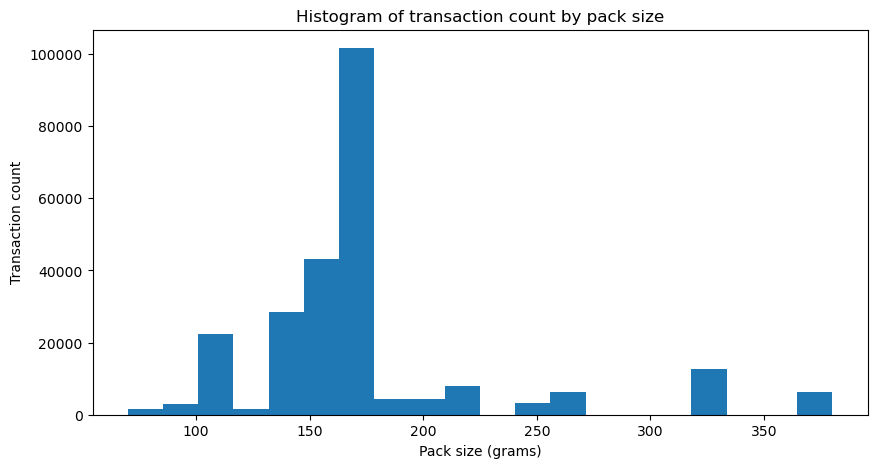

In [16]:
# Let's plot a histogram of PACK_SIZE_GRAMS since we know that it is a categorical variable and not a continuous variable even though it is numeric.

# create a histogram of transaction count by pack size
plt.figure(figsize = (10,5))
plt.hist(transaction_data['PACK_SIZE_GRAMS'], bins=20)
plt.xlabel('Pack size (grams)')
plt.ylabel('Transaction count')
plt.title('Histogram of transaction count by pack size')
plt.show()

In [17]:
# Now to create BRANDS column, we can use the first word in PROD_NAME to work out the brand name

transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.split().str[0]

# Print the updated data frame
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE_GRAMS,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150,Kettle


In [18]:
# Let's check all brands sold and thus spelling errors in the names

distinct_brands = transaction_data['BRAND'].unique()
print(distinct_brands)

['Natural' 'CCs' 'Smiths' 'Kettle' 'Grain' 'Doritos' 'Twisties' 'WW'
 'Thins' 'Burger' 'NCC' 'Cheezels' 'Infzns' 'Red' 'Pringles' 'Dorito'
 'Infuzions' 'Smith' 'GrnWves' 'Tyrrells' 'Cobs' 'French' 'RRD' 'Tostitos'
 'Cheetos' 'Woolworths' 'Snbts' 'Sunbites']


Seems like we have some brand names that have been mispelt and need to be correctly renamed: For example: Dorito and Doritos, Grain and GrnWves, Infzns and Infuzions, Natural and NCC, Red and RRD, Smith and Smiths, Snbts and Sunbites and WW and Woolworths.

In [19]:
# Let us rename all the incorrect brand names to their correct names
transaction_data['BRAND'] = transaction_data['BRAND'].replace({'Dorito': 'Doritos', 
                                                               'GrnWves': 'Grain', 
                                                               'Infzns': 'Infuzions', 
                                                               'NCC': 'Natural', 
                                                               'Red': 'RRD', 
                                                               'Smith': 'Smiths', 
                                                               'Snbts': 'Sunbites', 
                                                               'WW': 'Woolworths'})


In [20]:
# Let's confirm we have renamed all rows correctly

distinct_brands = transaction_data['BRAND'].unique()
print(distinct_brands)

['Natural' 'CCs' 'Smiths' 'Kettle' 'Grain' 'Doritos' 'Twisties'
 'Woolworths' 'Thins' 'Burger' 'Cheezels' 'Infuzions' 'RRD' 'Pringles'
 'Tyrrells' 'Cobs' 'French' 'Tostitos' 'Cheetos' 'Sunbites']


### Looking at the data summary statistics to check for any possible outliers

In [21]:
# Let's look at the summary statistics such as mean, min and max values for each feature to see if there are any obvious outliers in the data and if there are any nulls in any of the columns.

transaction_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE_GRAMS
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322,175.585178
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828,59.434727
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000,150.000000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000,170.000000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000,175.000000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.000000


After running summary statistics of our data, we realize that there is an outlier in PROD_QTY column that we need to investigate. A client purchased 200 packs of chips in one transaction while most of our purchases average at 1.9 per transaction.

In [22]:
# Let's zoom in on the customer who purchased 200 packs of chips in 1 transaction

# filter for transactions where PROD_QTY is equal to 200
df_filtered = transaction_data[transaction_data['PROD_QTY'] == 200]

# print the filtered data frame
print(df_filtered)


            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                         PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE_GRAMS  \
69762  Dorito Corn Chp     Supreme       200      650.0              380   
69763  Dorito Corn Chp     Supreme       200      650.0              380   

         BRAND  
69762  Doritos  
69763  Doritos  


In [23]:
# Let's check if the customer has made any other transactions over the year using their Loyalty card number

# filter for transactions where PROD_QTY is equal to 200
df_226000 = transaction_data[transaction_data['LYLTY_CARD_NBR'] == 226000]

# print the filtered data frame
print(df_226000)

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                         PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE_GRAMS  \
69762  Dorito Corn Chp     Supreme       200      650.0              380   
69763  Dorito Corn Chp     Supreme       200      650.0              380   

         BRAND  
69762  Doritos  
69763  Doritos  


It looks like this customer has only had the two transactions over the year and is not an ordinary retail customer. The customer might be buying chips for commercial purposes instead. We'll remove this loyalty card number from further analysis.

In [24]:
# Let's drop rows where LYLTY_CARD_NBR is equal to 226000
transaction_data = transaction_data[transaction_data['LYLTY_CARD_NBR'] != 226000]

# print the updated data frame
print(transaction_data)


             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0        Natural Chip        Compny SeaSalt         2        6.0   
1                          CCs Nacho Cheese         3        6.3   
2  

In [25]:
# Let's confirm we have dropped rows where LYLTY_CARD_NBR is equal to 226000

# filter for transactions where PROD_QTY is equal to 200
df_226000 = transaction_data[transaction_data['LYLTY_CARD_NBR'] == 226000]

# print the filtered data frame
print(df_226000)

Empty DataFrame
Columns: [DATE, STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR, PROD_NAME, PROD_QTY, TOT_SALES, PACK_SIZE_GRAMS, BRAND]
Index: []


In [26]:
# Count the number of transactions by date

# group transactions by date and count the number of transactions for each date
transactions_by_date = transaction_data.groupby(['DATE'])['TXN_ID'].count()

# print the result
print(transactions_by_date)

DATE
2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
             ... 
2019-06-26    657
2019-06-27    669
2019-06-28    673
2019-06-29    703
2019-06-30    704
Name: TXN_ID, Length: 364, dtype: int64


There's only 364 rows, meaning only 364 dates which indicates a missing date.

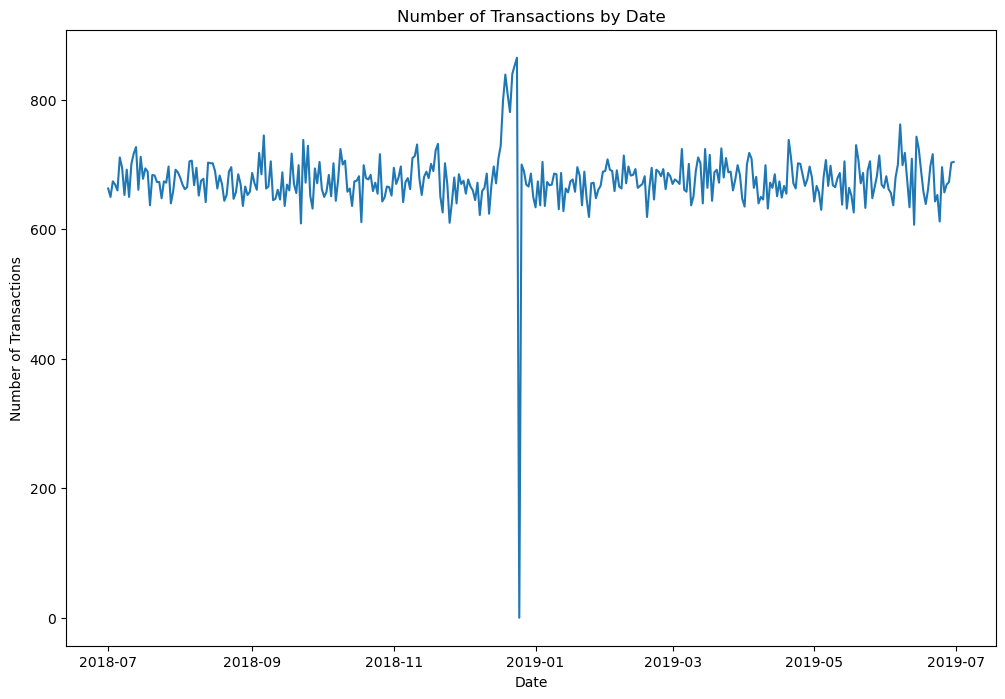

In [27]:
# Let's create a line chart to identify the missing date

# count the number of transactions by date
daily_transaction_counts = transaction_data.groupby('DATE')['TXN_ID'].count().reset_index()

# create a sequence of dates from 1 Jul 2018 to 30 Jun 2019
dates = pd.date_range(start='2018-07-01', end='2019-06-30')

# create a date data frame from the sequence of dates
date_df = pd.DataFrame({'DATE': dates})

# merge the date data frame with the transaction data and fill missing values with 0
merged_data = pd.merge(date_df, daily_transaction_counts, on='DATE', how='left')
merged_data['TXN_ID'] = merged_data['TXN_ID'].fillna(0)

# plot the number of transactions over time
plt.figure(figsize = (12,8))
plt.plot(merged_data['DATE'], merged_data['TXN_ID'])
plt.title('Number of Transactions by Date')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

From the Number of Transactions by Date graph above, we notice that there is a significant drop in the number of transactions to zero in late December. We need to zoom in on December to see when there was that drop and explain the missing day in our transaction data.

In [28]:
# Let's look at daily transactions in December only

# extract month from DATE column and filter to only include transactions in December
dec_data = transaction_data[transaction_data['DATE'].dt.month == 12]

# count number of transactions per day
transactions_per_day = dec_data.groupby('DATE')['TXN_ID'].count()

# print the resulting data frame
print(transactions_per_day)

DATE
2018-12-01    675
2018-12-02    655
2018-12-03    677
2018-12-04    666
2018-12-05    660
2018-12-06    645
2018-12-07    672
2018-12-08    622
2018-12-09    659
2018-12-10    664
2018-12-11    686
2018-12-12    624
2018-12-13    668
2018-12-14    697
2018-12-15    671
2018-12-16    709
2018-12-17    729
2018-12-18    799
2018-12-19    839
2018-12-20    808
2018-12-21    781
2018-12-22    840
2018-12-23    853
2018-12-24    865
2018-12-26    700
2018-12-27    690
2018-12-28    669
2018-12-29    666
2018-12-30    686
2018-12-31    650
Name: TXN_ID, dtype: int64


We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day.

In [30]:
# Let's check for any Nulls and NAs in our data
# Check for nulls
transaction_data.isnull().sum()

DATE               0
STORE_NBR          0
LYLTY_CARD_NBR     0
TXN_ID             0
PROD_NBR           0
PROD_NAME          0
PROD_QTY           0
TOT_SALES          0
PACK_SIZE_GRAMS    0
BRAND              0
dtype: int64

## Customer Data Dataset

In [34]:
# Import the QVI_transaction_data dataset into Jupyter Notebooks

file_location = 'C:\\Users\\DELL\\Desktop\\QVI DATA\\QVI Task 1\\'
customer_data = pd.read_csv(file_location + 'QVI_purchase_behaviour.csv')

In [35]:
# View the first 5 rows of our dataframe

customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [36]:
# View the last 5 rows of our dataframe

customer_data.tail()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget
72636,2373711,YOUNG SINGLES/COUPLES,Mainstream


In [37]:
# Let's count all the unique LYLTY_CARD_NBR data

customer_data['LYLTY_CARD_NBR'].nunique()


72637

In [38]:
# Let's see all unique LIFESTAGE data

customer_data['LIFESTAGE'].unique()


array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [39]:
# Let's see all unique PREMIUM_CUSTOMER data

customer_data['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [40]:
# Let's check for any Nulls and NAs in our data
# Check for nulls
customer_data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

### Merging the transaction_data with customer_data dataframes

In [41]:
# Let's merge the 2 dataframes to form one called customer_transaction_data

customer_transaction_data = pd.merge(transaction_data, customer_data, on='LYLTY_CARD_NBR')


In [42]:
# Let's view our combined dataframe

customer_transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE_GRAMS,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [43]:
# Let's check for any Nulls and NAs in our data
# Check for nulls
customer_transaction_data.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE_GRAMS     0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [44]:
# Let's export our dataset into a Microsoft Excel file which we can analyze and visualize in business inte

import os

# Define the directory path to save the file
directory = r'C:\Users\DELL\Desktop\QVI DATA\QVI Task 1'

# Define the file path
file_path = os.path.join(directory, 'customer_transaction_data.xlsx')

# Export the dataframe to Excel
customer_transaction_data.to_excel(file_path, index=False)

print(f"The file has been saved to {file_path}")

The file has been saved to C:\Users\DELL\Desktop\QVI DATA\QVI Task 1\customer_transaction_data.xlsx


## Data Analysis

### How many customers are in each segment?

### LIFESTAGE Segment

In [45]:
# Group the customer_transaction_data by LIFESTAGE and count the number of unique LYLTY_CARD_NBR values in each group
customer_count = customer_transaction_data.groupby('LIFESTAGE')['LYLTY_CARD_NBR'].nunique().sort_values(ascending=False)


# Print the customer count for each LIFESTAGE
print(customer_count)


LIFESTAGE
RETIREES                  14555
OLDER SINGLES/COUPLES     14389
YOUNG SINGLES/COUPLES     14044
OLDER FAMILIES             9630
YOUNG FAMILIES             9036
MIDAGE SINGLES/COUPLES     7141
NEW FAMILIES               2492
Name: LYLTY_CARD_NBR, dtype: int64


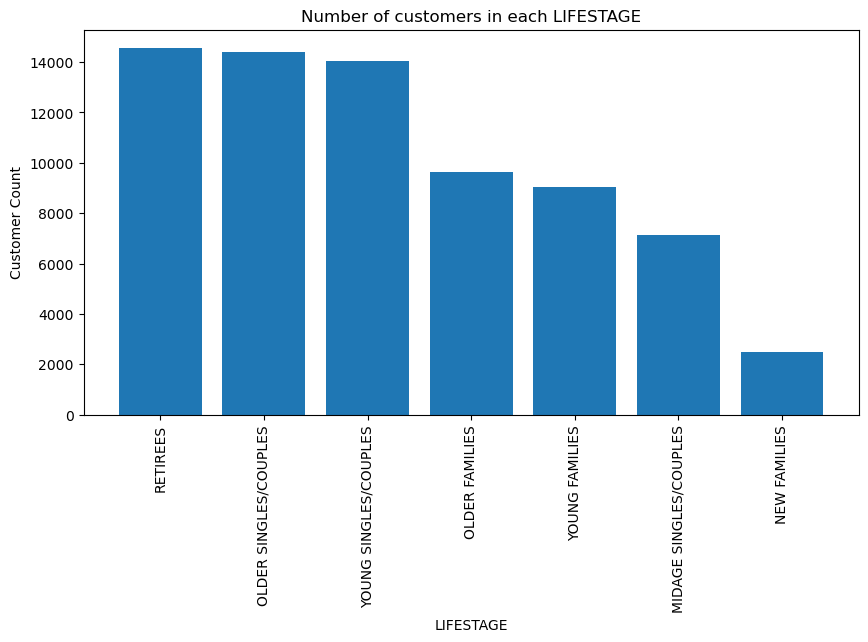

In [46]:
# Plot a bar graph of the customer count per lifestage

plt.figure(figsize=(10, 5))
plt.bar(customer_count.index, customer_count.values)
plt.xticks(rotation=90)
plt.xlabel('LIFESTAGE')
plt.ylabel('Customer Count')
plt.title('Number of customers in each LIFESTAGE')
plt.show()

The highest number of customers is retirees while new families are the least number of customers

### PREMIUM_CUSTOMER Segment

In [47]:
# Group the customer_transaction_data by PREMIUM_CUSTOMER and count the number of unique LYLTY_CARD_NBR values in each group

premium_count = customer_transaction_data.groupby('PREMIUM_CUSTOMER')['LYLTY_CARD_NBR'].nunique().sort_values(ascending=False)

# Print the customer count for each premium
print(premium_count)


PREMIUM_CUSTOMER
Mainstream    28734
Budget        24006
Premium       18547
Name: LYLTY_CARD_NBR, dtype: int64


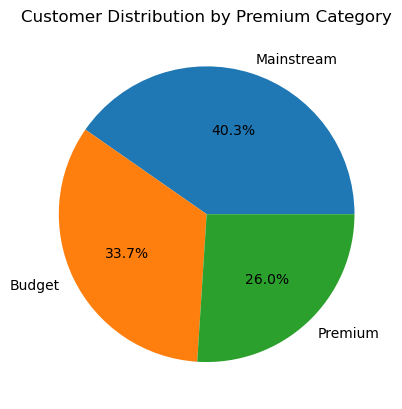

In [48]:
# create a pie chart to show distribution of Premium customer data

plt.pie(premium_count, labels=premium_count.index, autopct='%1.1f%%')
plt.title('Customer Distribution by Premium Category')
plt.show()

Mainstream customers are the majority in our data while premium are the least.

### Who spends the most on chips (total sales)? Describing customers by lifestage and how premium their general purchasing behaviour is.

### LIFESTAGE Segment

In [49]:
# What are the total sales by customer lifestage?

customer_sales_by_lifestage = customer_transaction_data.groupby(['LIFESTAGE'])['TOT_SALES'].sum().reset_index()
customer_sales_by_lifestage = customer_sales_by_lifestage.sort_values('TOT_SALES', ascending=False)
print(customer_sales_by_lifestage)


                LIFESTAGE  TOT_SALES
3   OLDER SINGLES/COUPLES  376019.65
4                RETIREES  342381.90
2          OLDER FAMILIES  328519.90
5          YOUNG FAMILIES  294627.90
6   YOUNG SINGLES/COUPLES  243756.60
0  MIDAGE SINGLES/COUPLES  172523.80
1            NEW FAMILIES   47347.95


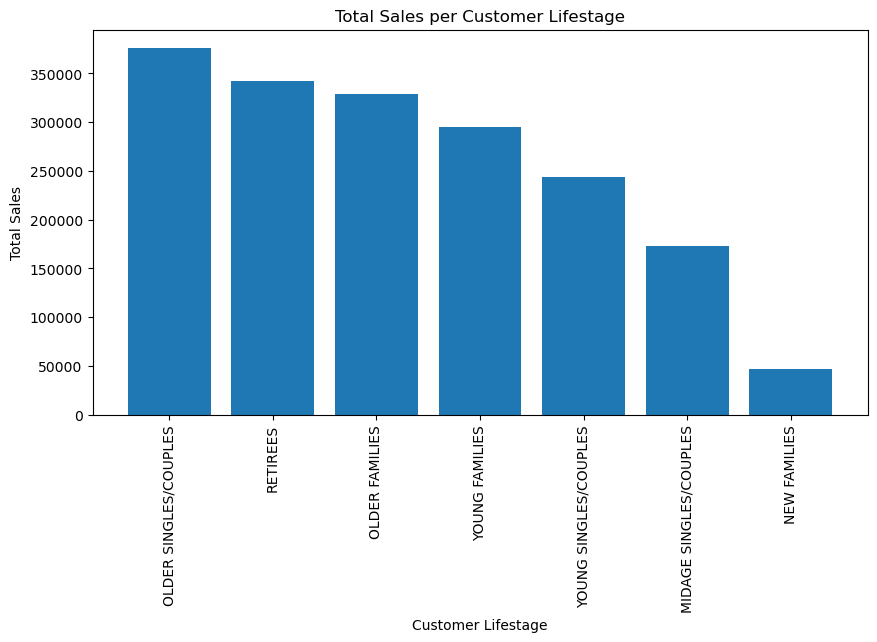

In [50]:
# Get the data
customer_sales_by_lifestage = customer_transaction_data.groupby(['LIFESTAGE'])['TOT_SALES'].sum().reset_index()
customer_sales_by_lifestage = customer_sales_by_lifestage.sort_values('TOT_SALES', ascending=False)

# Plot the graph to show total sales per customer lifestage
plt.figure(figsize=(10, 5))
plt.bar(customer_sales_by_lifestage['LIFESTAGE'], customer_sales_by_lifestage['TOT_SALES'])
plt.xticks(rotation=90)
plt.xlabel('Customer Lifestage')
plt.ylabel('Total Sales')
plt.title('Total Sales per Customer Lifestage')
plt.show()

Most sales were generated by Older singles/couples, retirees and older families, while the least sales were from new families. Perhaps this could be as a result of the purchasing power that older customers have which can be attributed to factors like being more established career wise hence more income, having more people in the family hence more purchases, unlike new families which might have less purchasing power.

### PREMIUM_CUSTOMER Segment

In [51]:
# What are the total sales by premium customer

customer_sales_by_premium = customer_transaction_data.groupby(['PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
customer_sales_by_premium = customer_sales_by_premium.sort_values('TOT_SALES', ascending=False)
print(customer_sales_by_premium)


  PREMIUM_CUSTOMER  TOT_SALES
1       Mainstream  700865.40
0           Budget  631406.85
2          Premium  472905.45


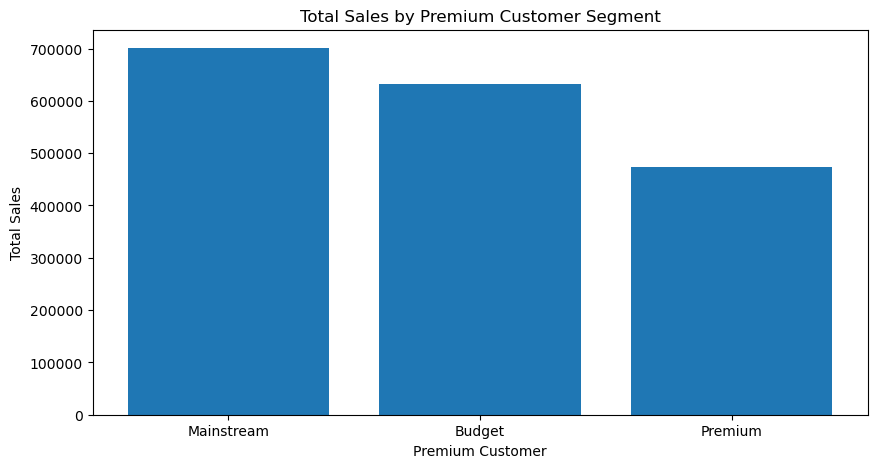

In [52]:
# Plot a graph to total sales by premium customer 

# Aggregate the transaction data by premium customer segment and sum the TOT_SALES column
premium_sales = customer_transaction_data.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().reset_index()

# Sort the data in descending order by TOT_SALES
premium_sales = premium_sales.sort_values('TOT_SALES', ascending=False)

# Plot a bar graph of total sales by premium customer segment
plt.figure(figsize=(10, 5))
plt.bar(premium_sales['PREMIUM_CUSTOMER'], premium_sales['TOT_SALES'])
plt.xlabel('Premium Customer')
plt.ylabel('Total Sales')
plt.title('Total Sales by Premium Customer Segment')
plt.show()

Most sales were genarated by mainstream customers, which we can attribute to the same customer segment having majority of the customers.

### What is the relationship between total sales and customer segments and number of customers per customer segment?

### Total Sales per Customer Segment

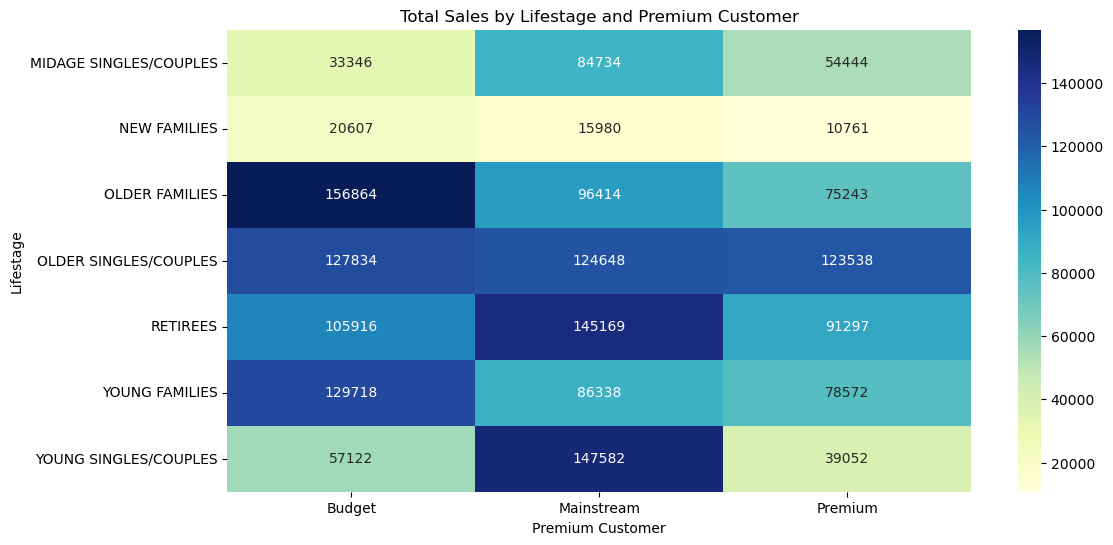

In [53]:
# Lets plot a graph to show total sales by lifestage and premium customer

pivot_table = customer_transaction_data.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='TOT_SALES', aggfunc='sum')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Total Sales by Lifestage and Premium Customer')
plt.xlabel('Premium Customer')
plt.ylabel('Lifestage')
plt.show()

Budget-older families, mainstream- young couples/singles and mainstream- retirees generated the most sales while premium- new families generated the least sales. Customer segments with most sales could be attributed to factors like high number of customers in the segment, ability to buy more chips at a relatively lower price for budget- older families, indicating conscious purchasing behaviour and ability to buy more chips at relatively higher prices for mainstream- young singles/couples and mainstream- retirees, indicating impulse purchasing behaviour.  

### Number of Customers per Customer Segment

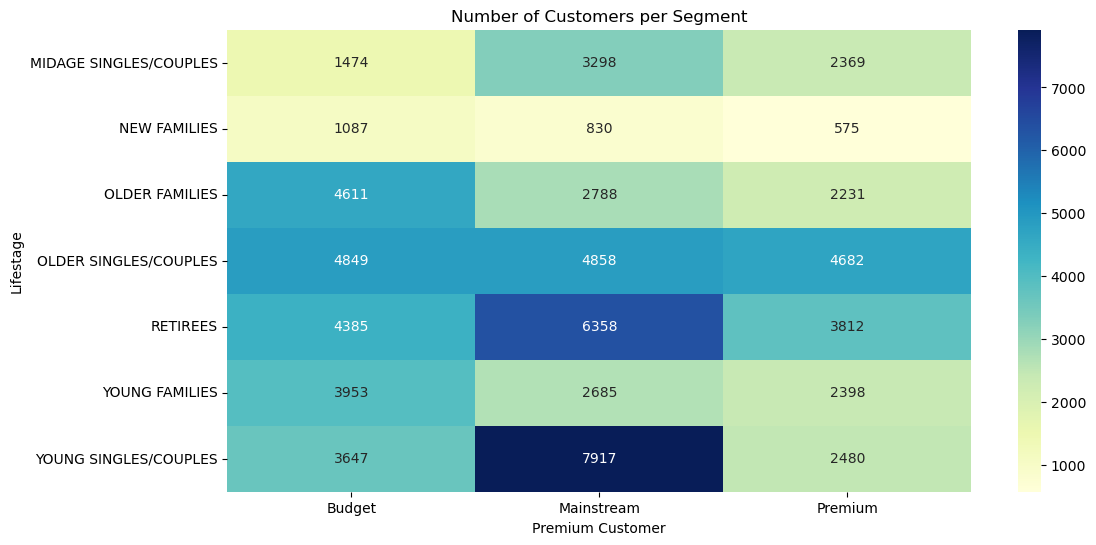

In [54]:
# Let's a graph to show numn=ber of customers per customer segment

pivot_table = customer_transaction_data.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='LYLTY_CARD_NBR', aggfunc='nunique')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Number of Customers per Segment')
plt.xlabel('Premium Customer')
plt.ylabel('Lifestage')
plt.show()

Most sales were generated by budget - older families, mainstream - young singles/couples and mainstream - retirees while the least was from premium - new families, mainstream - new families and budget - new families. 
There are more mainstream - young singles/couples and mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment.
The consistency in low sales for all segments in the new families category can be attributed to the low number of customers in this category.


### How many chips are bought per customer by segment?

### LIFESTAGE Column

In [55]:
# What are the total chip purchases by customer lifestage

total_purchases_by_lifestage = customer_transaction_data.groupby(['LIFESTAGE'])['PROD_QTY'].sum().reset_index()
total_purchases_by_lifestage = total_purchases_by_lifestage.sort_values('PROD_QTY', ascending=False)
print(total_purchases_by_lifestage)

                LIFESTAGE  PROD_QTY
3   OLDER SINGLES/COUPLES     97185
2          OLDER FAMILIES     87896
4                RETIREES     87875
5          YOUNG FAMILIES     78577
6   YOUNG SINGLES/COUPLES     62300
0  MIDAGE SINGLES/COUPLES     44496
1            NEW FAMILIES     12070


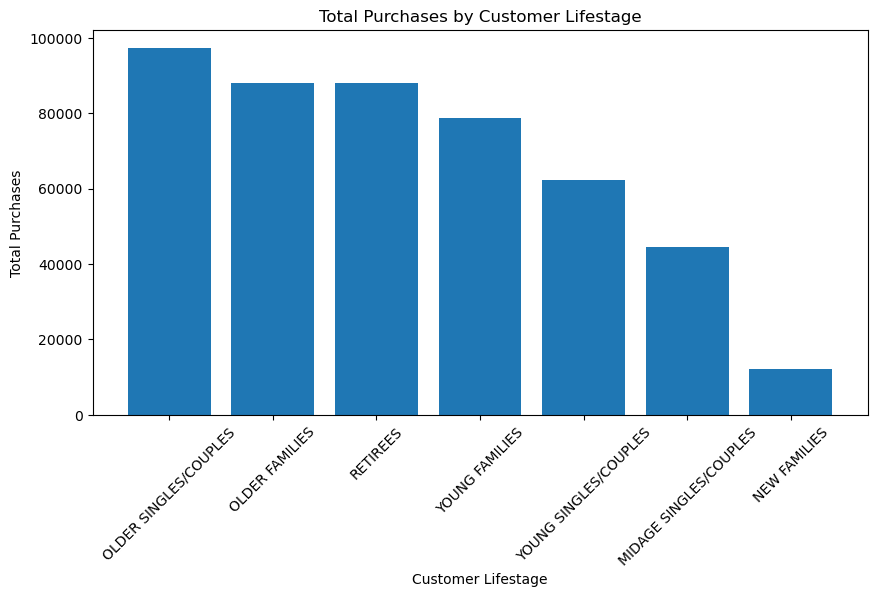

In [56]:
# Let's plot a graph to show total chip purchases by customer lifestage

# Group the data by lifestage and calculate the total sales for each group
total_purchases_by_lifestage = customer_transaction_data.groupby('LIFESTAGE')['PROD_QTY'].sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.bar(total_purchases_by_lifestage.index, total_purchases_by_lifestage.values)
plt.title('Total Purchases by Customer Lifestage')
plt.xlabel('Customer Lifestage')
plt.ylabel('Total Purchases')
plt.xticks(rotation=45)
plt.show()

Older singles/couples, older families and retirees purchased more chips as compared to the rest of the segments

### PREMIUM CUSTOMER Segment

In [57]:
# What are the total chip purchases by premium customer

total_purchases_by_premium = customer_transaction_data.groupby(['PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index()
total_purchases_by_premium = total_purchases_by_premium.sort_values('PROD_QTY', ascending=False)
print(total_purchases_by_premium)

  PREMIUM_CUSTOMER  PROD_QTY
1       Mainstream    180780
0           Budget    165774
2          Premium    123845


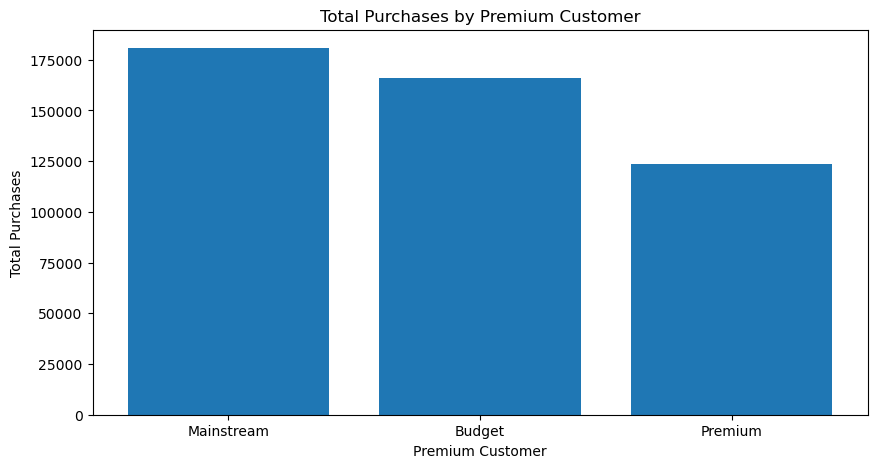

In [58]:
# Let's plot a graph to show total purchases per premium customer segment

# Aggregate the transaction data by premium customer segment and sum the TOT_SALES column
premium_purchases = customer_transaction_data.groupby('PREMIUM_CUSTOMER')['PROD_QTY'].sum().reset_index()

# Sort the data in descending order by TOT_SALES
premium_purchases = premium_purchases.sort_values('PROD_QTY', ascending=False)

# Plot a bar graph of total sales by premium customer segment
plt.figure(figsize=(10, 5))
plt.bar(premium_sales['PREMIUM_CUSTOMER'], premium_purchases['PROD_QTY'])
plt.xlabel('Premium Customer')
plt.ylabel('Total Purchases')
plt.title('Total Purchases by Premium Customer')
plt.show()

Mainstream customers purchased more chips as compared to the rest of the segments

### What is the relationship between total chip purchases vs all customer segments combined?

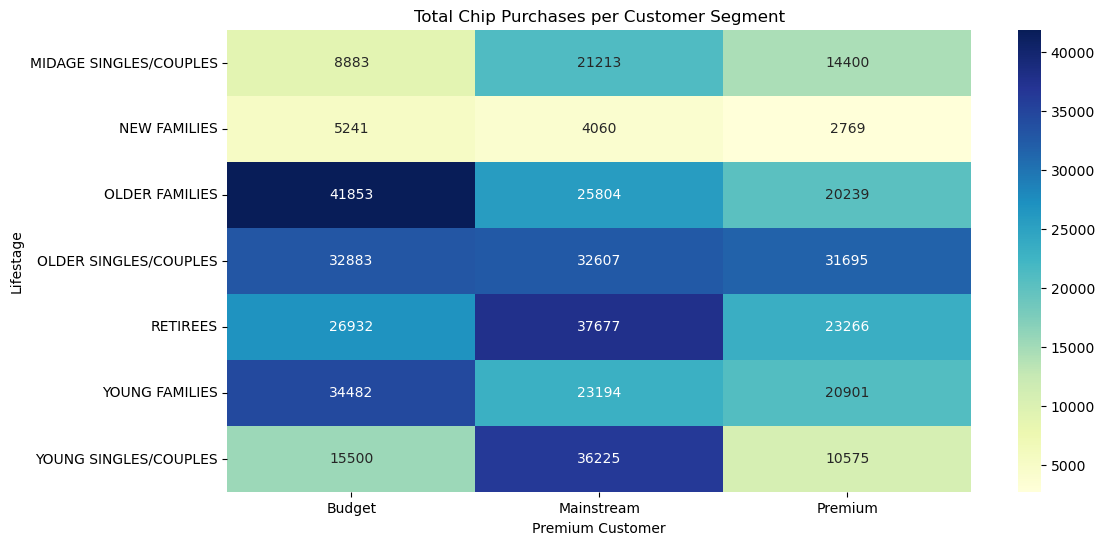

In [59]:
# Lets plot a graph to show total chip purchases per customer segment

pivot_table = customer_transaction_data.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='PROD_QTY', aggfunc='sum')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Total Chip Purchases per Customer Segment')
plt.xlabel('Premium Customer')
plt.ylabel('Lifestage')
plt.show()

Budget - older families bought more chips and generated more sales compared to mainstream - young singles/couples and mainstream - retirees despite being a relatively lower number of budget - older families

Despite being a smaller demographic group in terms of quantity, older families exhibited a higher purchasing frequency of chips and generated greater sales compared to mainstream - young singles/couples and mainstream - retirees. This analytical observation highlights the significant contribution of older families to the overall revenue and emphasizes the importance of targeting this particular consumer segment.

### What's the average chip price by customer segment?

In [60]:
# Let's create a new column in our dataframe to calculate price per chip 

customer_transaction_data['PRICE'] = customer_transaction_data['TOT_SALES'] / customer_transaction_data['PROD_QTY']

In [61]:
# Let's view our new column data

customer_transaction_data['PRICE']

0         3.00
1         2.10
2         1.90
3         2.10
4         1.45
          ... 
246735    5.40
246736    4.40
246737    4.40
246738    3.90
246739    4.40
Name: PRICE, Length: 246740, dtype: float64

### What's the average price for the LIFESTAGE segments?

In [62]:
# Average price for the lifestage segments

average_price_by_lifestage = customer_transaction_data.groupby('LIFESTAGE')['PRICE'].mean().reset_index()
average_price_by_lifestage = average_price_by_lifestage.sort_values('PRICE', ascending=False)
print(average_price_by_lifestage)


                LIFESTAGE     PRICE
1            NEW FAMILIES  3.906726
6   YOUNG SINGLES/COUPLES  3.893653
4                RETIREES  3.889036
0  MIDAGE SINGLES/COUPLES  3.871211
3   OLDER SINGLES/COUPLES  3.863061
5          YOUNG FAMILIES  3.750432
2          OLDER FAMILIES  3.736389


### What's the average price for the PREMIUM_CUSTOMER segments?

In [63]:
# Average price for the premium customer segments

average_price_by_premium = customer_transaction_data.groupby('PREMIUM_CUSTOMER')['PRICE'].mean().reset_index()
average_price_by_premium = average_price_by_premium.sort_values('PRICE', ascending=False)
print(average_price_by_premium)


  PREMIUM_CUSTOMER     PRICE
1       Mainstream  3.873657
2          Premium  3.813059
0           Budget  3.801726


### A graph showing average prices per customer segments

Text(0.5, 1.0, 'Average Price by Lifestage and Premium Customer')

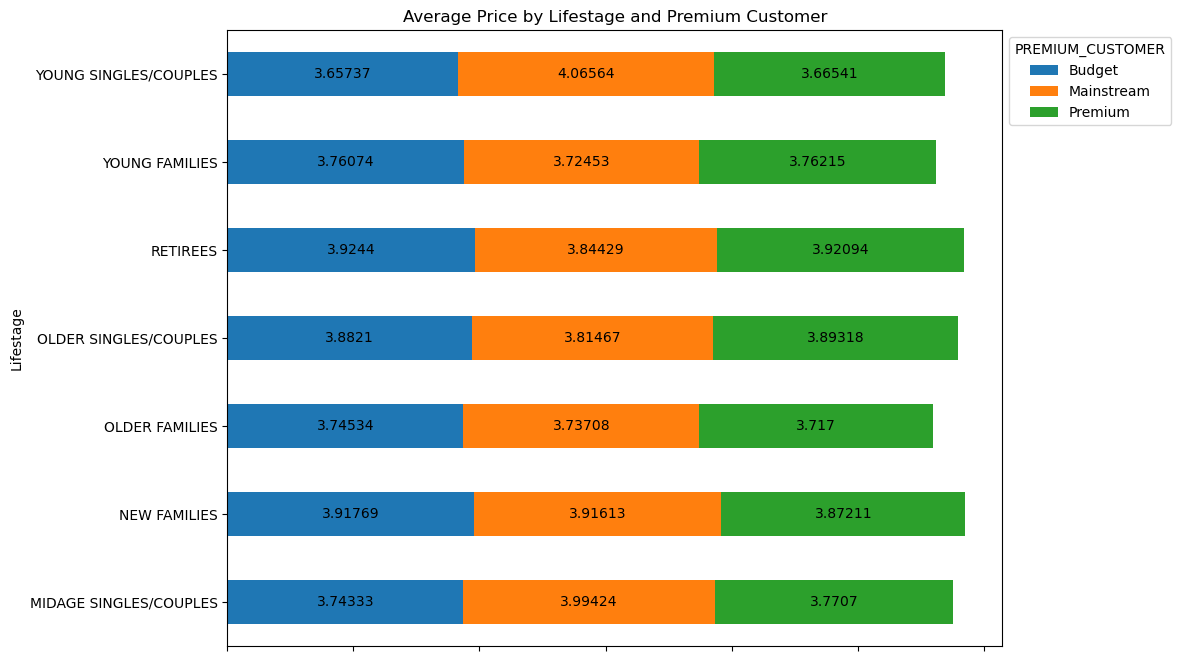

In [64]:
# Create pivot table
pivot_table = customer_transaction_data.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='PRICE', aggfunc='mean')

# Plot stacked bar chart
ax = pivot_table.plot(kind='barh', stacked=True, figsize=(10,8))

# Add data labels to bars
for i in ax.containers:
    ax.bar_label(i, label_type='center')

# Add legend
ax.legend(title='PREMIUM_CUSTOMER', bbox_to_anchor=(1, 1))

# Set axis labels
ax.set_ylabel('Lifestage')

# Remove x-axis labels and gridlines
ax.set_xticklabels([])
ax.xaxis.grid(False)

# Set title
ax.set_title('Average Price by Lifestage and Premium Customer')


We can see that mainstream - young singles/couples and mainstream - midage singles/couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. Premium shoppers tend to purchase healthy snacks, and when they do buy chips, it's usually for entertainment rather than personal consumption. Consequently, there are fewer premium midage and young singles/couples buying chips in comparison to mainstream consumers.

However, the difference between the average prices is not large and we can do an independent t-test between mainstream vs premium and budget midage and young singles and couples to see if the difference is significant.

### t-test between mainstream vs premium and budget midage and young singles and couples

In [65]:
from scipy.stats import ttest_ind

# Create data sets
mainstream = customer_transaction_data.loc[customer_transaction_data['PREMIUM_CUSTOMER'] == 'Mainstream', 'PRICE']
premium = customer_transaction_data.loc[customer_transaction_data['PREMIUM_CUSTOMER'] == 'Premium', 'PRICE']
midage_young = customer_transaction_data.loc[(customer_transaction_data['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') | (customer_transaction_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES'), 'PRICE']
budget_midage_young = customer_transaction_data.loc[(customer_transaction_data['PREMIUM_CUSTOMER'] == 'Budget') & ((customer_transaction_data['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') | (customer_transaction_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')), 'PRICE']

# Perform t-test between mainstream and premium
ttest_main_prem = ttest_ind(mainstream, premium)
print('Mainstream vs Premium t-test result:')
print('t-statistic: ', ttest_main_prem.statistic)
print('p-value: ', ttest_main_prem.pvalue)

# Perform t-test between budget midage/young and premium
ttest_budg_prem = ttest_ind(budget_midage_young, premium)
print('Budget Midage/Young vs Premium t-test result:')
print('t-statistic: ', ttest_budg_prem.statistic)
print('p-value: ', ttest_budg_prem.pvalue)

Mainstream vs Premium t-test result:
t-statistic:  11.096115580393358
p-value:  1.3420572458727282e-28
Budget Midage/Young vs Premium t-test result:
t-statistic:  -12.107902561398284
p-value:  1.0282477403220971e-33


The t-test results in a p-value of 1.342, i.e. the unit price for mainstream, young and mid-age singles and couples ARE NOT significantly higher than that of budget or premium, young and midage singles and couples.

### Deep dive into the mainstream - young singles/couples customer segment

### Preferred Brand

In [66]:
# What is the most bought brand by mainstream young singles/couples?

# Filter for mainstream young singles and couples
mainstream_young = customer_transaction_data[(customer_transaction_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (customer_transaction_data['PREMIUM_CUSTOMER'] == 'Mainstream')]

# Count brand purchases
brand_counts = mainstream_young['BRAND'].value_counts()

# Print brand purchases
print(brand_counts)


Kettle        3844
Doritos       2379
Pringles      2315
Smiths        1921
Infuzions     1250
Thins         1166
Twisties       900
Tostitos       890
RRD            875
Cobs           864
Grain          646
Tyrrells       619
Woolworths     479
Natural        394
Cheezels       346
CCs            222
Cheetos        166
Sunbites       128
French          78
Burger          62
Name: BRAND, dtype: int64


### A graph showing brand purchases in the mainstream - young singles/couples segment

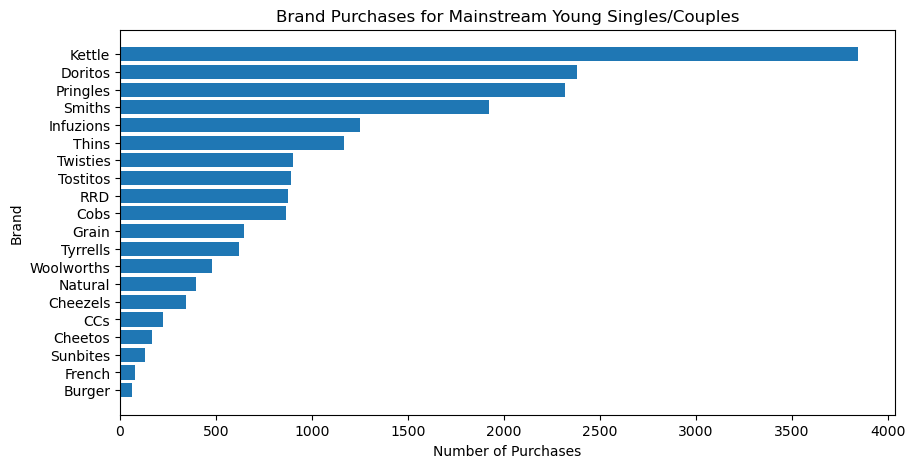

In [67]:

# Filter for mainstream young singles and couples
mainstream_young = customer_transaction_data[(customer_transaction_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (customer_transaction_data['PREMIUM_CUSTOMER'] == 'Mainstream')]

# Count brand purchases
brand_counts = mainstream_young['BRAND'].value_counts()

# Sort by count in descending order
brand_counts = brand_counts.sort_values(ascending=False)

# Plot horizontal bar graph
plt.figure(figsize = (10,5))
plt.barh(brand_counts.index, brand_counts.values)
plt.gca().invert_yaxis()
plt.title('Brand Purchases for Mainstream Young Singles/Couples')
plt.xlabel('Number of Purchases')
plt.ylabel('Brand')
plt.show()

We can see that the most preferred brands of chips by the mainstream - young singles/couples are Kettle, Doritos and Pringles

In [68]:
# Average price for the chip brands

average_price_by_brand = customer_transaction_data.groupby('BRAND')['PRICE'].mean().reset_index()
average_price_by_brand = average_price_by_brand.sort_values('PRICE', ascending=False)
print(average_price_by_brand)

         BRAND     PRICE
9       Kettle  4.936630
5      Doritos  4.679196
3     Cheezels  4.562829
17    Twisties  4.499439
16    Tostitos  4.400000
18    Tyrrells  4.199783
4         Cobs  3.800000
13      Smiths  3.770631
11    Pringles  3.699838
8    Infuzions  3.651299
7        Grain  3.504734
15       Thins  3.299742
2      Cheetos  3.052648
10     Natural  3.000000
6       French  3.000000
12         RRD  2.835984
0       Burger  2.300000
1          CCs  2.100000
19  Woolworths  1.838577
14    Sunbites  1.700000


### Preferred Pack Size

In [69]:
# What is the most bought pack size in this segment?

# Filter for mainstream young singles and couples
mainstream_young = customer_transaction_data[(customer_transaction_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (customer_transaction_data['PREMIUM_CUSTOMER'] == 'Mainstream')]

# Count brand purchases
pack_counts = mainstream_young['PACK_SIZE_GRAMS'].value_counts()

# Print brand purchases
print(pack_counts)




175    4997
150    3080
134    2315
110    2051
170    1575
330    1195
165    1102
380     626
270     620
210     576
135     290
250     280
200     179
190     148
90      128
160     128
180      70
70       63
220      62
125      59
Name: PACK_SIZE_GRAMS, dtype: int64


### Graph showing most preferred pack size for mainstream - young singles/couples

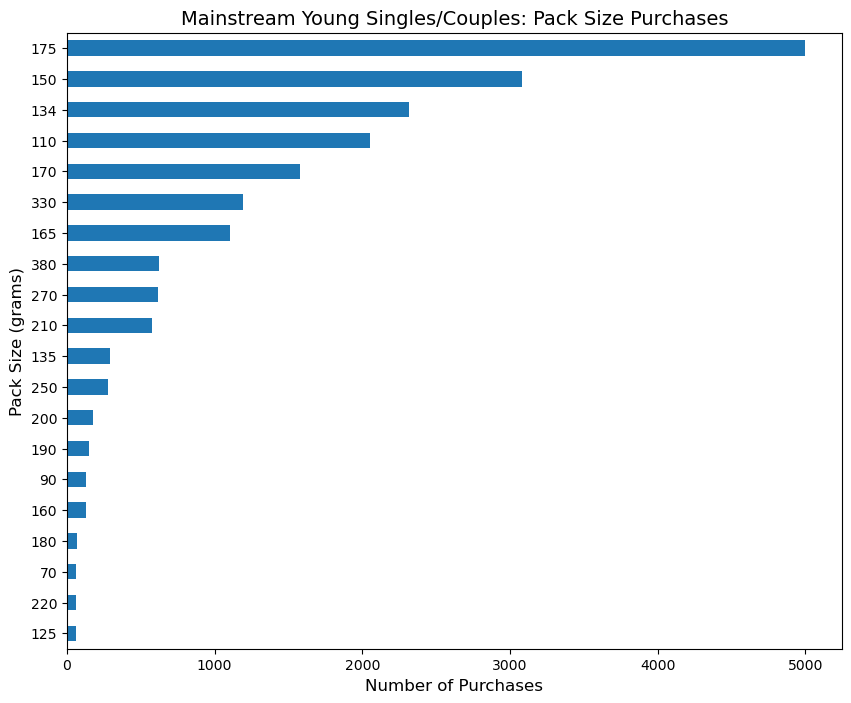

In [70]:

# Filter for mainstream young singles and couples
mainstream_young = customer_transaction_data[(customer_transaction_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (customer_transaction_data['PREMIUM_CUSTOMER'] == 'Mainstream')]

# Count pack size purchases
pack_counts = mainstream_young['PACK_SIZE_GRAMS'].value_counts()

# Plot horizontal bar chart
fig, ax = plt.subplots(figsize=(10,8))
pack_counts.sort_values().plot(kind='barh', ax=ax)

# Set chart title and axis labels
ax.set_title('Mainstream Young Singles/Couples: Pack Size Purchases', fontsize=14)
ax.set_xlabel('Number of Purchases', fontsize=12)
ax.set_ylabel('Pack Size (grams)', fontsize=12)

# Show plot
plt.show()


The most preferred pack size by this category is 175 grams which is also the average pack size of all the pack sizes.

In [71]:
# Average price for the chip brands

average_price_by_size = customer_transaction_data.groupby('PACK_SIZE_GRAMS')['PRICE'].mean().reset_index()
average_price_by_size = average_price_by_size.sort_values('PRICE', ascending=False)
print(average_price_by_size)

    PACK_SIZE_GRAMS     PRICE
19              380  6.132318
18              330  5.700000
17              270  4.600000
16              250  4.300000
5               135  4.200000
9               170  3.846597
10              175  3.832752
2               110  3.799915
6               150  3.773747
4               134  3.699838
14              210  3.599464
8               165  3.486331
11              180  3.100000
12              190  2.540735
0                70  2.400000
15              220  2.300000
3               125  2.100000
7               160  1.900000
13              200  1.900000
1                90  1.700000


In [72]:
# Average Pack Size

average_pack_size = customer_transaction_data['PACK_SIZE_GRAMS'].mean()
print(average_pack_size)


175.5835211153441


The Mainstream-young singles/couples segment's most preferred pack size is 175 grams which is also the average pack size of all the chips sold.

### Insights

Sales of chips have been driven by Budget - older families, Mainstream - young singles/couples, and Mainstream- retirees shoppers. Mainstream, midage and young singles/couples are more likely to make impulse purchases and spend more per packet of chips. Mainstream young singles/couples buy more Kettle, Doritos and Pringles chips than the rest of the chips. The Category Manager can increase visibility and impulse buying behavior by off-locating the top 3 chip brands and smaller packs of chips in discretionary spaces where young singles and couples frequent. Quantium can provide recommendations on these segments and measure the impact of the changes to placement.